In [29]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

from tqdm.notebook import tqdm
from glob import glob

import datetime

<AxesSubplot:xlabel='time'>

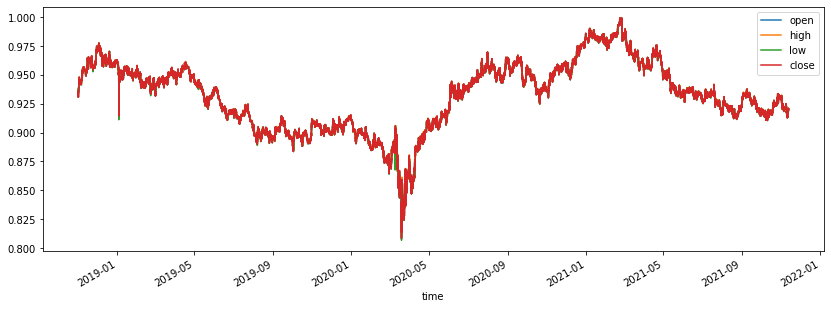

In [15]:
data_path = glob('zip_data/*.csv')[0]
data = pd.read_csv(data_path, index_col=0)
data.index = pd.to_datetime(data.index)
data.plot(figsize=(14,5))

  0%|          | 0/623 [00:00<?, ?it/s]

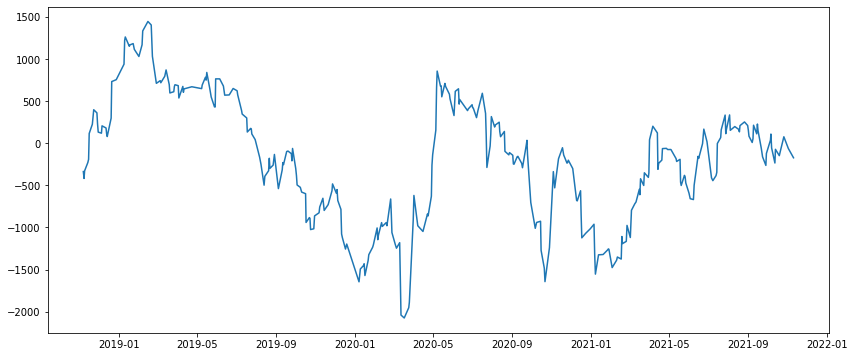

In [81]:
MONEY = list()
MONEY.append(0)
TRADE_LOGIC = list()
TRADE_DATES = list()


POSITION_VOLUME = 100_000
SLIPADGE = 10

AVAILABLE_DATES = list()

for _ in np.unique(data.index.date):
    ASIAN_START = datetime.datetime.combine(_, datetime.time(hour=15))
    ASIAN_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=8))
    ENGLISH_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=15))

    if (ASIAN_START in data.index) and (ASIAN_END in data.index) and (ENGLISH_END in data.index):
        AVAILABLE_DATES.append(_)


for _ in tqdm(AVAILABLE_DATES, leave=False):
    if _ + datetime.timedelta(days=1) in AVAILABLE_DATES:

        ASIAN_START = datetime.datetime.combine(_, datetime.time(hour=15))
        ASIAN_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=8))
        ENGLISH_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=15))
        ASIAN_DATA = data.loc[ASIAN_START:ASIAN_END]

        HOLD_DATA = data.loc[ASIAN_END:ENGLISH_END]

        LOW = ASIAN_DATA.close.min()
        MAX = ASIAN_DATA.close.max()

        CLOSE = HOLD_DATA.iloc[-1].close
        for _arrow_ in HOLD_DATA.index:
            current_price = HOLD_DATA.loc[_arrow_].open
            if current_price > MAX:
                #MONEY.append((POSITION_VOLUME / current_price) * CLOSE - POSITION_VOLUME - SLIPADGE + MONEY[-1])
                MONEY.append((-1 * (POSITION_VOLUME / current_price) * CLOSE) + POSITION_VOLUME - SLIPADGE + MONEY[-1])
                if MONEY[-1] < 0:
                    MONEY[-1] = MONEY[-1]
                TRADE_LOGIC.append('BUY')
                TRADE_DATES.append(_arrow_)
                break
            if current_price < LOW:
                #MONEY.append((-1 * (POSITION_VOLUME / current_price) * CLOSE) + POSITION_VOLUME - SLIPADGE + MONEY[-1])
                MONEY.append((POSITION_VOLUME / current_price) * CLOSE - POSITION_VOLUME - SLIPADGE + MONEY[-1])
                if MONEY[-1] < 0:
                    MONEY[-1] = MONEY[-1]
                TRADE_LOGIC.append('SELL')
                TRADE_DATES.append(_arrow_)
                break

plt.figure(figsize=(14,6))
plt.plot(TRADE_DATES, MONEY[1:])

In [66]:
data['2018-11-10']

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1705/927876240.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2018-11-10']


,open,high,low,close
time,,,,
2018-11-10 00:00:00,0.954225,0.954315,0.954195,0.954295
2018-11-10 00:01:00,0.954295,0.954410,0.954295,0.954395
2018-11-10 00:02:00,0.954395,0.954510,0.954395,0.954500
2018-11-10 00:03:00,0.954500,0.954500,0.954385,0.954395
2018-11-10 00:04:00,0.954395,0.954480,0.954395,0.954450
2018-11-10 00:05:00,0.954450,0.954540,0.954425,0.954435
2018-11-10 00:06:00,0.954435,0.954485,0.954270,0.954370
2018-11-10 00:07:00,0.954370,0.954370,0.954250,0.954315
2018-11-10 00:08:00,0.954315,0.954340,0.954190,0.954220


In [69]:
data.loc['2018-11-10 08:10:00']

KeyError: '2018-11-10 08:10:00'

2018-11-01
2018-11-02
2018-11-05
2018-11-06
2018-11-07
2018-11-08
2018-11-09
2018-11-10
2018-11-12
2018-11-13
2018-11-14
2018-11-15
2018-11-16
2018-11-17
2018-11-19
2018-11-20
2018-11-21
2018-11-22
2018-11-23
2018-11-24
2018-11-26
2018-11-27
2018-11-28
2018-11-29
2018-11-30
2018-12-01
2018-12-03
2018-12-04
2018-12-05
2018-12-06
2018-12-07
2018-12-08
2018-12-10
2018-12-11
2018-12-12
2018-12-13
2018-12-14
2018-12-15
2018-12-17
2018-12-18
2018-12-19
2018-12-20
2018-12-21
2018-12-22
2018-12-24
2018-12-26
2018-12-27
2018-12-28
2018-12-29
2018-12-31
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-18